In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/home/eren/Belgeler/ml/data.csv")
data.head()
data.info()
data.drop(["Unnamed: 32", "id"], axis=1, inplace = True)
M= data[data.diagnosis=="M"]
B= data[data.diagnosis=="B"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

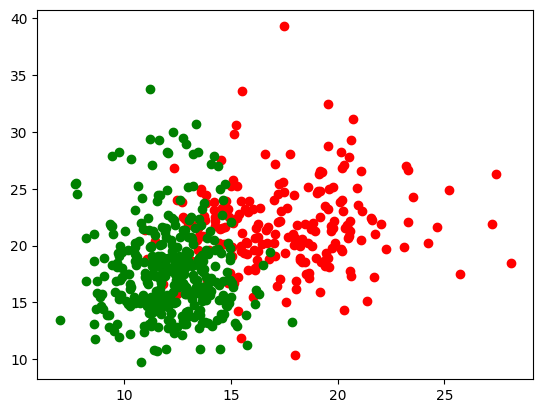

In [3]:
plt.scatter(M.radius_mean,M.texture_mean, color="red", label="malignant")
plt.scatter(B.radius_mean,B.texture_mean, color="green", label="benign")


Text(0, 0.5, 'texture_mean')

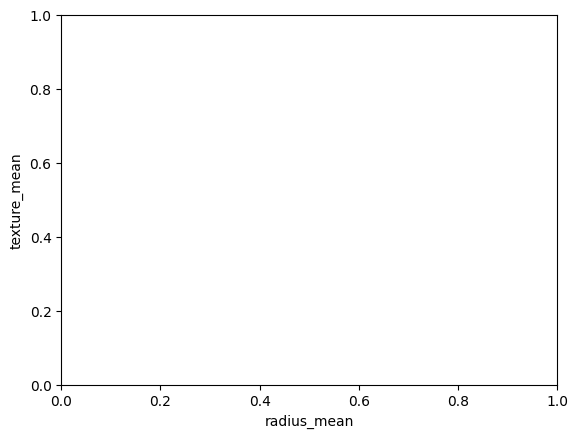

In [4]:
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


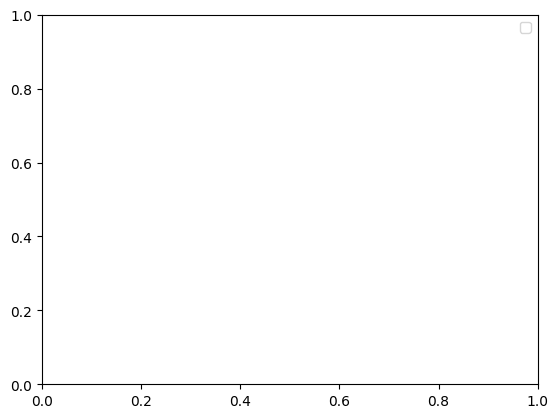

In [5]:
plt.legend()
plt.show()
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data= data.iloc[:,1:3]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_classification = DecisionTreeClassifier(random_state=1,criterion='entropy')
tree_classification.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [8]:
y_head=tree_classification.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_head)

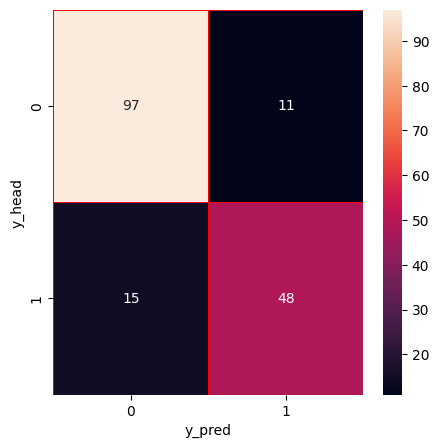

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_head")
plt.show()